# III -  Stock price prediction 
##    **by Ramsh Babu**

In [3]:
import yfinance as yf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import mplfinance as mpf
import matplotlib.animation as animation
np.warnings.filterwarnings('ignore')

#### Input params ##################
test_size = 0.2                 # proportion of dataset to be used as test set
cv_size = 0.2                   # proportion of dataset to be used as cross-validation set
Nmax = 210                       # for feature at day t, we use lags from t-1, t-2, ..., t-N as features
                                # Nmax is the maximum N we are going to test
fontsize = 14
ticklabelsize = 14
####################################

## Load data

In [4]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'MSFT'

data = yf.download(tickerSymbol, start="2020-01-01", end="2021-04-30",
                   group_by="ticker")
data = data.reset_index()
data.to_csv("mydata.csv")

df = pd.read_csv("mydata.csv", sep = ",")
df = data

# Convert Date column to datetime
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get month of each sample
df['month'] = df['date'].dt.month

# Sort by datetime
df.sort_values(by='date', inplace=True, ascending=True)



#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
tickerDf = data

df.head(10)

df.columns

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj_close,volume,month
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,158.571075,22622100,1
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,156.596588,21116200,1
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,157.001373,20813700,1
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,155.569855,21634100,1
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,158.047836,27746500,1
5,2020-01-09,161.839996,162.220001,161.029999,162.089996,160.022308,21385000,1
6,2020-01-10,162.820007,163.220001,161.179993,161.339996,159.281876,20725900,1
7,2020-01-13,161.759995,163.309998,161.259995,163.279999,161.197144,21626500,1
8,2020-01-14,163.389999,163.600006,161.720001,162.130005,160.061798,23477400,1
9,2020-01-15,162.619995,163.940002,162.570007,163.179993,161.098419,21417900,1


Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume', 'month'], dtype='object')

,date,open,high,low,close,adj_close,volume,month
320,2021-04-12,254.710007,257.670013,254.619995,255.910004,255.910004,27148700,4
321,2021-04-13,257.260010,259.190002,256.829987,258.489990,258.489990,23837500,4
322,2021-04-14,257.480011,258.829987,255.160004,255.589996,255.589996,23070900,4
323,2021-04-15,257.929993,259.929993,257.730011,259.500000,259.500000,25627500,4
324,2021-04-16,259.470001,261.000000,257.600006,260.739990,260.739990,24856900,4
325,2021-04-19,260.190002,261.480011,257.820007,258.739990,258.739990,23195800,4
326,2021-04-20,257.820007,260.200012,256.839996,258.260010,258.260010,19712400,4
327,2021-04-21,258.940002,260.679993,257.250000,260.579987,260.579987,24030400,4
328,2021-04-22,260.209991,261.779999,255.639999,257.170013,257.170013,25585600,4
329,2021-04-23,257.880005,261.410004,257.269989,261.220001,261.220001,8853665,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       330 non-null    datetime64[ns]
 1   open       330 non-null    float64       
 2   high       330 non-null    float64       
 3   low        330 non-null    float64       
 4   close      330 non-null    float64       
 5   adj_close  330 non-null    float64       
 6   volume     330 non-null    int64         
 7   month      330 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 23.2 KB


In [5]:

splits = tickerData.splits
dividends= tickerData.dividends
sustainability = tickerData.sustainability
options = tickerData.options
isin = tickerData.isin

# show financials
financials  = tickerData.financials
quarterly_financials = tickerData.quarterly_financials

major_holders=tickerData.major_holders
institutional_holders=tickerData.institutional_holders
balance_sheet=tickerData.balance_sheet
quarterly_balance_sheet=tickerData.quarterly_balance_sheet
cashflow=tickerData.cashflow
quarterly_cashflow=tickerData.quarterly_cashflow
earnings=tickerData.earnings
quarterly_earnings=tickerData.quarterly_earnings
sustainability=tickerData.sustainability
recommendations=tickerData.recommendations
calendar=tickerData.calendar
actions = tickerData.actions
options=tickerData.options
info = tickerData.info



In [6]:
type(splits)
splitsd = pd.DataFrame(splits)
type(splitsd)

pandas.core.series.Series

pandas.core.frame.DataFrame

In [7]:
type(dividends)
dividendsd = pd.DataFrame(dividends)
type(dividendsd)

pandas.core.series.Series

pandas.core.frame.DataFrame

In [8]:
optionsd = pd.DataFrame(options)
optionsd

,0
0,2021-04-23
1,2021-04-30
2,2021-05-07
3,2021-05-14
4,2021-05-21
5,2021-05-28
6,2021-06-18
7,2021-07-16
8,2021-08-20
9,2021-09-17


In [9]:
infod=pd.DataFrame.from_dict(info, orient='index')
infod

,0
zip,98052-6399
sector,Technology
fullTimeEmployees,163000
longBusinessSummary,"Microsoft Corporation develops, licenses, and ..."
city,Redmond
...,...
impliedSharesOutstanding,None
category,None
fiveYearAverageReturn,None
regularMarketPrice,261.243


In [10]:
with pd.ExcelWriter('data.xlsx', engine="xlsxwriter") as writer:  
    calendar.to_excel(writer, sheet_name='calendar')
    actions.to_excel(writer, sheet_name='actions')
    recommendations.to_excel(writer, sheet_name='recommendations')
    splits.to_excel(writer, sheet_name='splits')
    infod.to_excel(writer, sheet_name='infod')
    dividends.to_excel(writer, sheet_name='dividends')
    sustainability.to_excel(writer, sheet_name='sustainability')
    quarterly_financials.to_excel(writer, sheet_name='quarterly_financials')
    financials.to_excel(writer, sheet_name='financials')
    major_holders.to_excel(writer, sheet_name='major_holders')
    institutional_holders.to_excel(writer, sheet_name='institutional_holders')
    balance_sheet.to_excel(writer, sheet_name='balance_sheet')
    quarterly_balance_sheet.to_excel(writer, sheet_name='quarterly_balance_sheet')
    cashflow.to_excel(writer, sheet_name='cashflow')
    quarterly_cashflow.to_excel(writer, sheet_name='quarterly_cashflow')
    earnings.to_excel(writer, sheet_name='earnings')
    quarterly_earnings.to_excel(writer, sheet_name='quarterly_earnings')
    sustainability.to_excel(writer, sheet_name='sustainability')
    recommendations.to_excel(writer, sheet_name='recommendations')
    calendar.to_excel(writer, sheet_name='calendar')
    optionsd.to_excel(writer, sheet_name='optionsd')
    dividendsd.to_excel(writer, sheet_name='dividendsd')
    splitsd.to_excel(writer, sheet_name='splits') 
    worksheet = writer.sheets['splits']
    worksheet.write_string(0, 4, isin)
    writer.save()   

0

In [9]:
#!pip install python-docx

In [10]:
type(options)
type(info)
type(dividends)
type(splits)

print("options")
options
print("info")
info
print("dividends")
dividends
print("splits")
splits


tuple

dict

pandas.core.series.Series

pandas.core.series.Series

options


('2021-04-23',
 '2021-04-30',
 '2021-05-07',
 '2021-05-14',
 '2021-05-21',
 '2021-05-28',
 '2021-06-18',
 '2021-07-16',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

info


{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

dividends


Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-02-19    0.51
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
2021-02-17    0.56
Name: Dividends, Length: 69, dtype: float64

splits


Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

### Visualizing the Stock Data

In [11]:
tickerDf = tickerDf.reset_index()
for i in ['open', 'high', 'close', 'low']: 
      tickerDf[i]  =  tickerDf[i].astype('float64')

In [12]:
#!pip install --upgrade mplfinance

In [13]:
tickerDf = tickerData.history(period='1d', start='2021-3-1', end='2021-4-17')

#see your data
daily = tickerDf.drop(columns=['Dividends', 'Stock Splits'])

#daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)

(34, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-01,235.899994,237.470001,233.149994,236.940002,25324000
2021-03-02,237.009995,237.300003,233.449997,233.869995,22785500
2021-03-03,232.160004,233.580002,227.259995,227.559998,33950400


,Open,High,Low,Close,Volume
Date,,,,,
2021-04-14,257.480011,258.829987,255.160004,255.589996,23070900
2021-04-15,257.929993,259.929993,257.730011,259.500000,25627500
2021-04-16,259.470001,261.000000,257.600006,260.739990,24856900


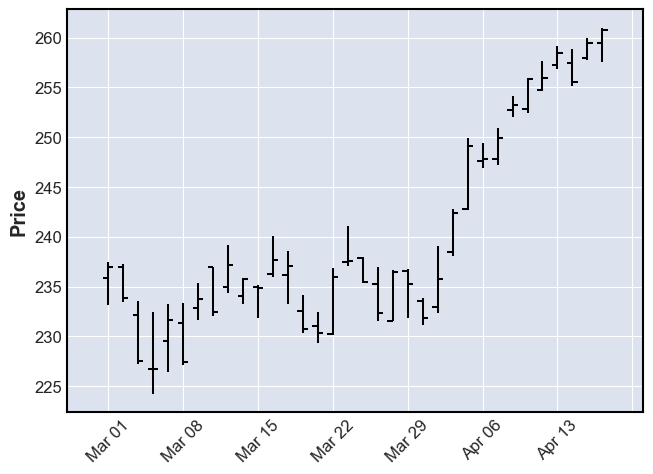

In [14]:
import mplfinance as mpf
mpf.plot(daily)

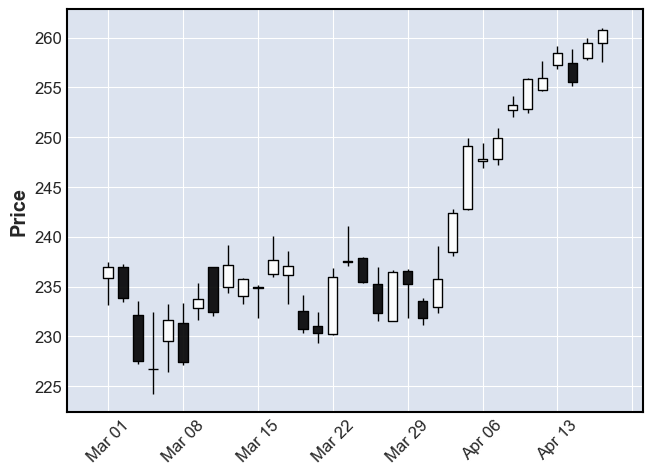

In [15]:
mpf.plot(daily,type='candle')

In [16]:
mpf.plot(daily,type='pnf',savefig='ct.png')

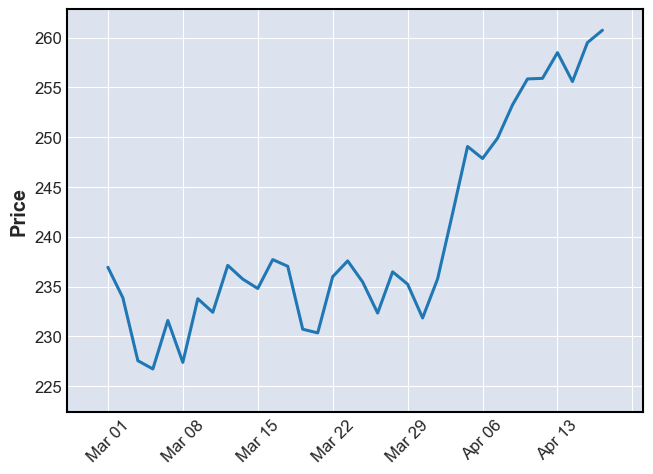

In [17]:
mpf.plot(daily,type='line')

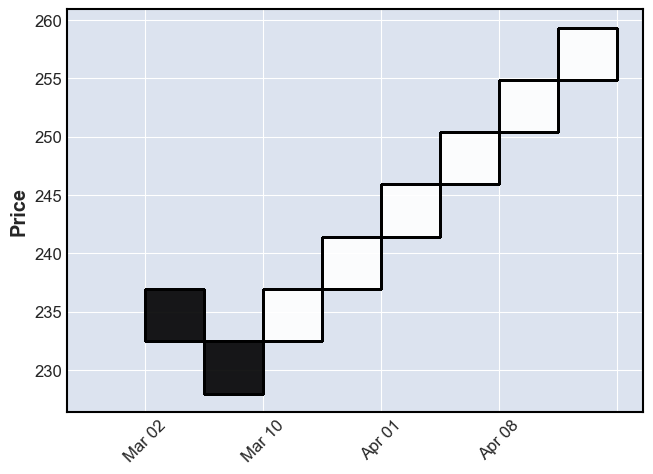

In [18]:
daily.index.name = 'Date'
mpf.plot(daily,type='renko')

In [19]:
mpf.plot(daily,type='pnf',savefig='readme_plot.png')

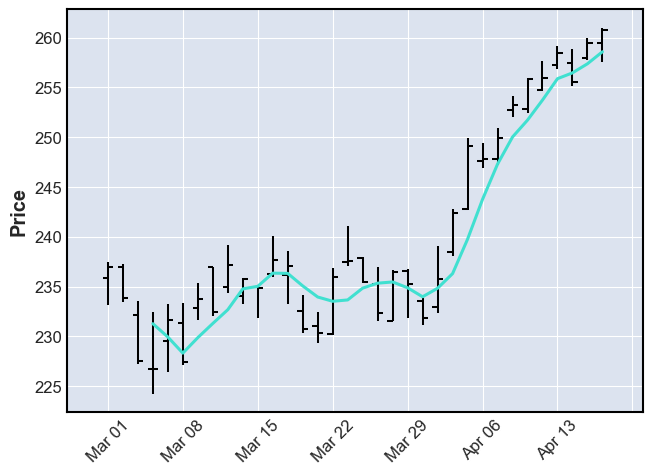

In [20]:
mpf.plot(daily,type='ohlc',mav=4)

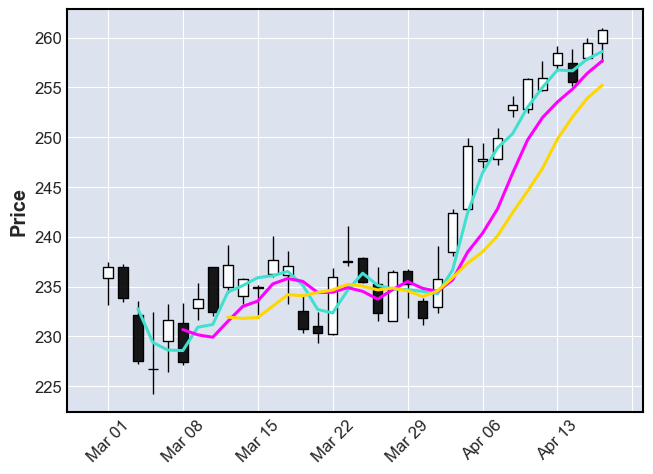

In [21]:
mpf.plot(daily,type='candle',mav=(3,6,9))

We can also display Volume

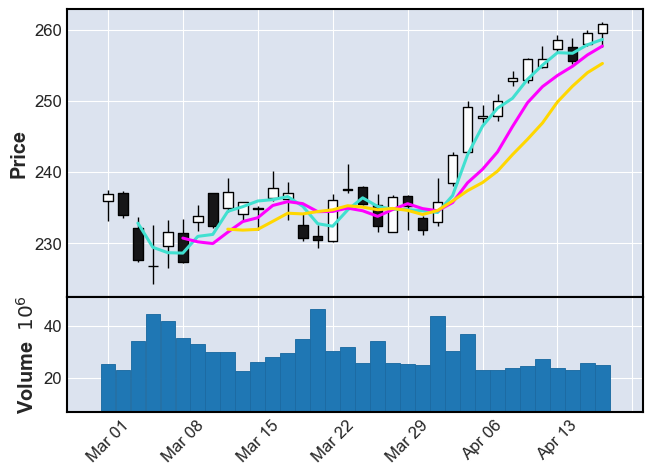

In [22]:
mpf.plot(daily,type='candle',mav=(3,6,9),volume=True)

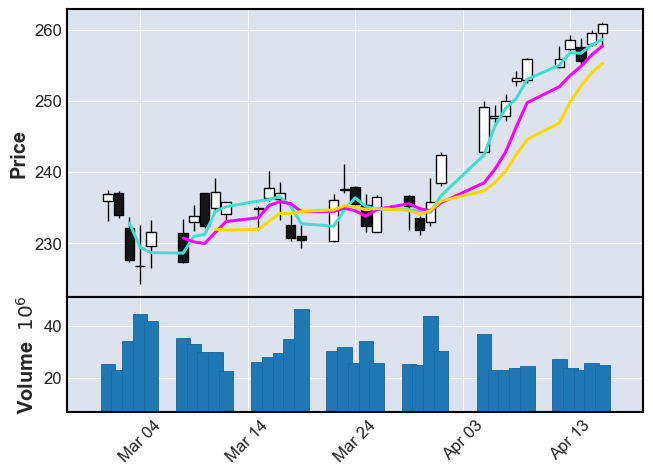

In [23]:
mpf.plot(daily,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

We can also plot intraday data:

In [24]:

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2021-4-09', end='2021-4-13',interval = "1m")
intraday = tickerDf 

intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
intraday.head(3)
intraday.tail(3)

(780, 6)

,Open,High,Low,Close,Dividends,Stock Splits
Date,,,,,,
2021-04-09 09:30:00-04:00,252.869995,253.035004,252.500000,252.690002,0,0
2021-04-09 09:31:00-04:00,252.639999,252.949997,252.543503,252.639099,0,0
2021-04-09 09:32:00-04:00,252.589996,252.669998,252.440002,252.497498,0,0


,Open,High,Low,Close,Dividends,Stock Splits
Date,,,,,,
2021-04-12 15:57:00-04:00,255.899994,256.019989,255.789993,255.979996,0,0
2021-04-12 15:58:00-04:00,255.979996,256.149994,255.830002,255.928101,0,0
2021-04-12 15:59:00-04:00,255.940002,256.220001,255.589996,255.919998,0,0


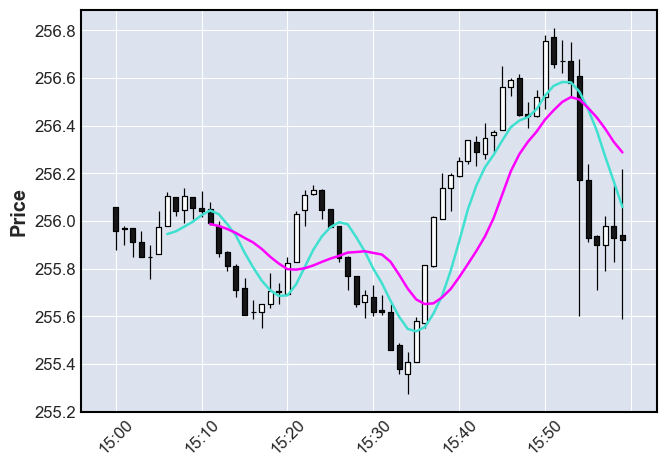

In [25]:
#Let's look at the last hour of trading on April 12th, with a 7 minute and 12 minute moving average.
iday = intraday.loc['2021-04-12 15:00':'2021-04-12 16:00',:]
mpf.plot(iday,type='candle',mav=(7,12))

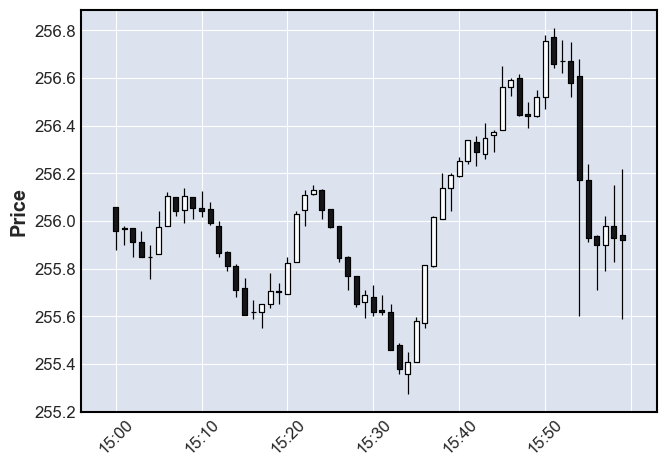

In [26]:
iday = intraday.loc['2021-04-12 15:00':'2021-04-12 16:00',:]
mpf.plot(iday,type='candle')

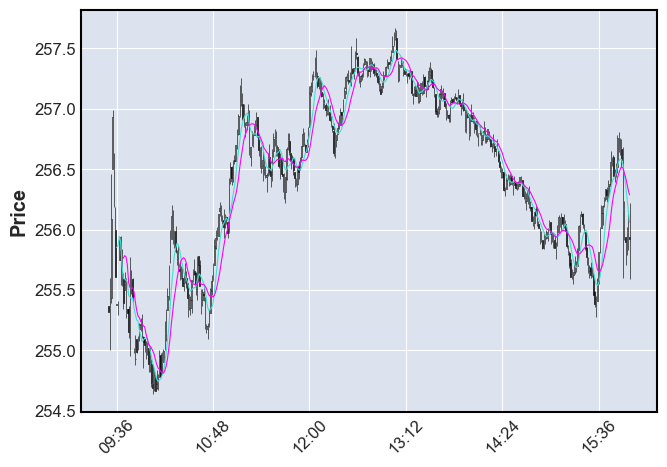

In [27]:

iday = intraday.loc['2021-04-12 7:00':'2021-04-12 18:00',:]
mpf.plot(iday,type='candle',show_nontrading=True,mav=(7,12))

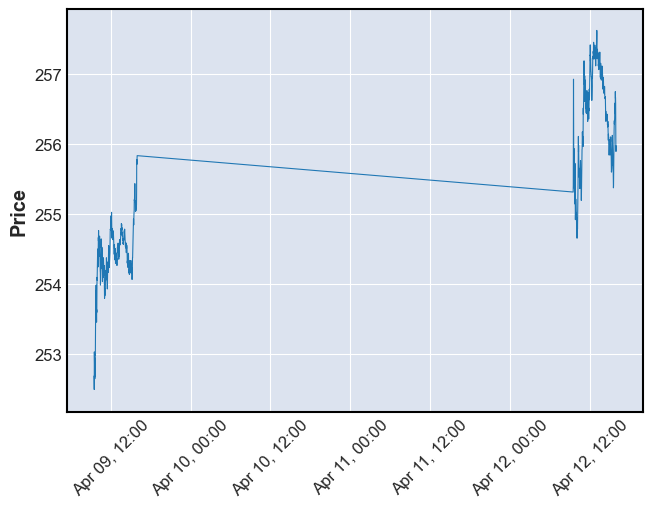

In [28]:
mpf.plot(intraday,type='line',show_nontrading=True)

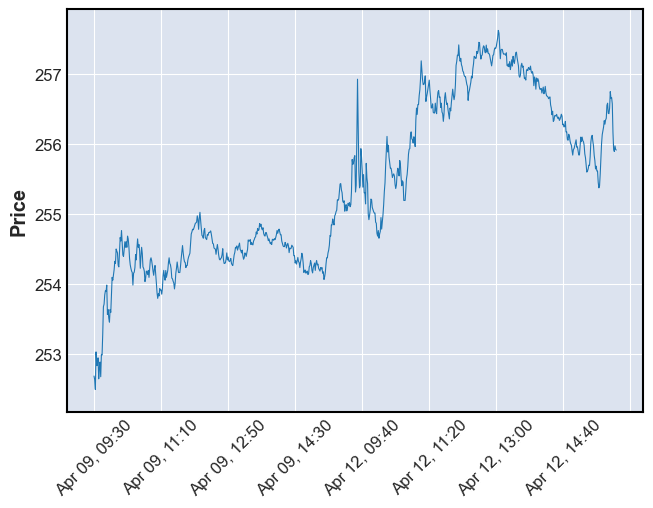

In [29]:
mpf.plot(intraday,type='line') 

(34, 5)

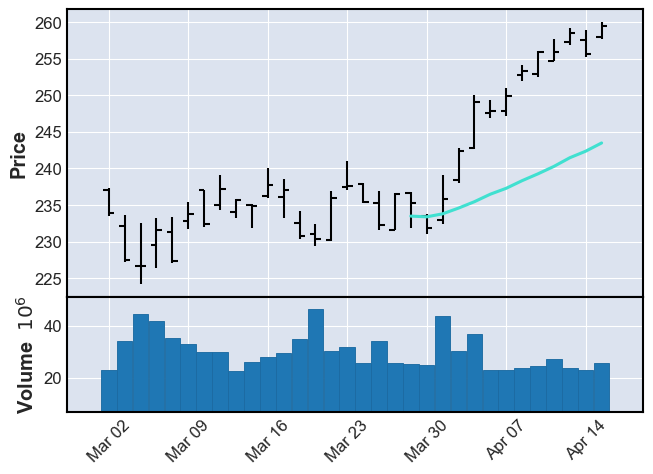

In [30]:
df = daily
daily.shape
mpf.plot(df[1:33],type='ohlc_bars',volume=True,mav=(20,40))

In [31]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

In [32]:
macd = exp12 - exp26
#MACD, short for moving average convergence/divergence,

In [33]:
signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

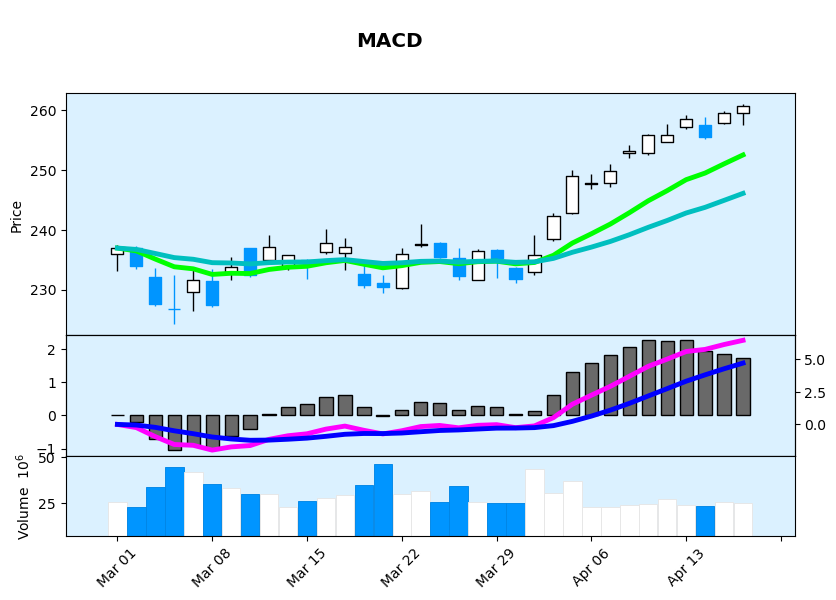

In [34]:
apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

mpf.plot(daily,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style='blueskies',volume=True,volume_panel=2,panel_ratios=(6,3,2))

(327, 8)

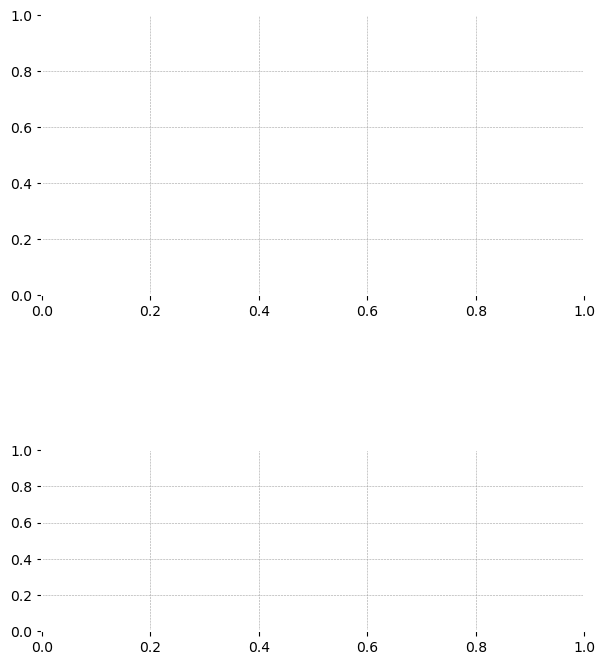

In [35]:
idf = data
#daily
#pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
idf.shape
#idf.head(3)
#idf.tail(3)

#df = idf.loc['2020-1-1':'2020-2-30',:]
df = idf[100:360]
fig = mpf.figure(style='charles',figsize=(7,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(3,1,3)

def animate(ival):
    if (20+ival) > len(df):
        print('no more data to plot')
        ani.event_source.interval *= 3
        if ani.event_source.interval > 12000:
            exit()
        return
    data = df.iloc[0:(20+ival)]
    ax1.clear()
    ax2.clear()
    mpf.plot(data,ax=ax1,volume=ax2,type='candle')

ani = animation.FuncAnimation(fig, animate, interval=250)

mpf.show()

In [36]:
df = idf[100:360]
df

,date,open,high,low,close,adj_close,volume,month
100,2020-05-27,180.199997,181.990005,176.600006,181.809998,180.482285,39517100,5
101,2020-05-28,180.740005,184.149994,180.380005,181.399994,180.075272,33810200,5
102,2020-05-29,182.729996,184.270004,180.410004,183.250000,181.911774,42146700,5
103,2020-06-01,182.539993,183.000000,181.460007,182.830002,181.494843,22622400,6
104,2020-06-02,184.250000,185.000000,181.350006,184.910004,183.559647,30794600,6
...,...,...,...,...,...,...,...,...
322,2021-04-14,257.480011,258.829987,255.160004,255.589996,255.589996,23070900,4
323,2021-04-15,257.929993,259.929993,257.730011,259.500000,259.500000,25627500,4
324,2021-04-16,259.470001,261.000000,257.600006,260.739990,260.739990,24856900,4
325,2021-04-19,260.190002,261.480011,257.820007,258.739990,258.739990,23209300,4


## StockPrediction_mov_avg

# Objective
* yyyymmdd: 
    * Predict stock price in next day using simple moving average
    * Given prices for the last N days, we do prediction for day N+1

In [37]:
def get_preds_mov_avg(df, target_col, N, pred_min, offset):
    """
    Given a dataframe, get prediction at timestep t using values from t-1, t-2, ..., t-N.
    Using simple moving average.
    Inputs
        df         : dataframe with the values you want to predict. Can be of any length.
        target_col : name of the column you want to predict e.g. 'adj_close'
        N          : get prediction at timestep t using values from t-1, t-2, ..., t-N
        pred_min   : all predictions should be >= pred_min
        offset     : for df we only do predictions for df[offset:]. e.g. offset can be size of training set
    Outputs
        pred_list  : list. The predictions for target_col. np.array of length len(df)-offset.
    """
    pred_list = df[target_col].rolling(window = N, min_periods=1).mean() # len(pred_list) = len(df)
    
    # Add one timestep to the predictions
    pred_list = np.concatenate((np.array([np.nan]), np.array(pred_list[:-1])))
    
    # If the values are < pred_min, set it to be pred_min
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
    
    return pred_list[offset:]

def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Text(0.5, 0, 'date')

Text(0, 0.5, 'USD')

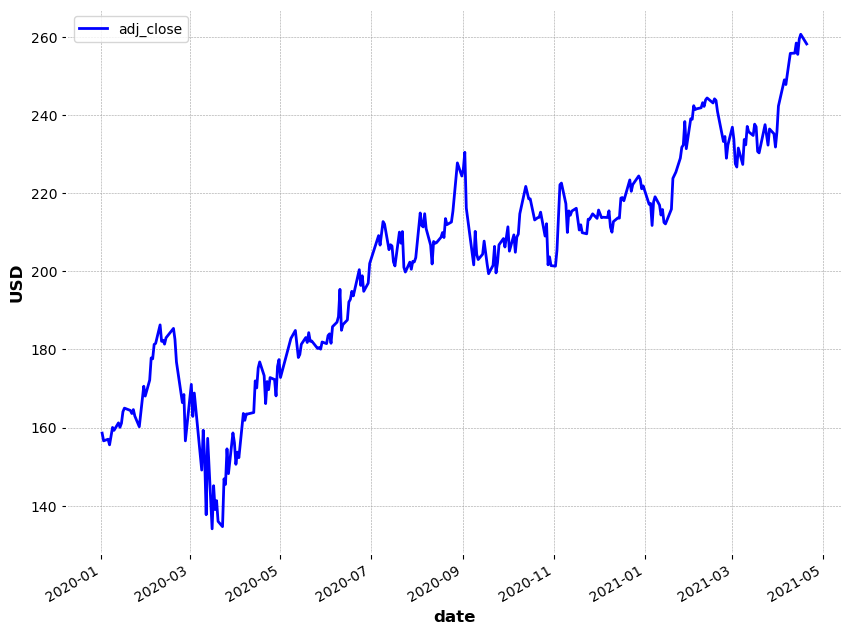

In [38]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = data.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

## Split into train, dev and test set

In [39]:
# Get sizes of each of the datasets
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 137
num_cv = 45
num_test = 45
train.shape = (137, 8)
cv.shape = (45, 8)
train_cv.shape = (182, 8)
test.shape = (45, 8)


## EDA

Text(0.5, 0, 'date')

Text(0, 0.5, 'USD')

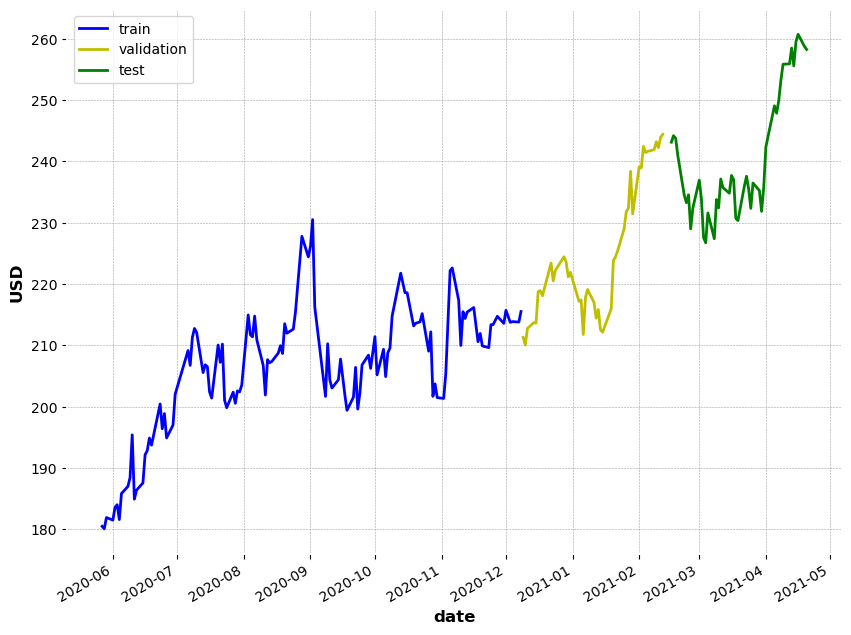

In [40]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

## Predict using Moving Average

In [41]:
RMSE = []
mape = []
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_mov_avg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('MAPE = ' + str(mape))
df.head()

RMSE = [3.243030826376773, 3.331488301896923, 3.7148332286502863, 4.119721223082456, 4.61047012420919, 5.035932739534097, 5.46990231972521, 5.892711200949083, 6.328389233867004, 6.730606113250531, 7.110152745152884, 7.463096266207467, 7.7902840715731445, 8.080765622497289, 8.350408855373606, 8.59348881747012, 8.822380619718114, 9.024127412663539, 9.213261303591969, 9.369424917277648, 9.497052222534425, 9.612433192469192, 9.719462615390805, 9.812612594010542, 9.90094487371938, 9.984832795291302, 10.052093707912707, 10.114885965410734, 10.179568734340089, 10.252125542785992, 10.336105005887884, 10.431645204216066, 10.539490254409714, 10.655573912934038, 10.774094373521457, 10.896206975064393, 11.026168231399849, 11.15666661910413, 11.29065324763363, 11.426670914137295, 11.553446182975634, 11.667347536399209, 11.767400449404699, 11.856942114176702, 11.936261200597604, 12.01342684662706, 12.087487219556731, 12.158139239235325, 12.220278909620692, 12.278657733923817, 12.335609691248978, 12.

,date,open,high,low,close,adj_close,volume,month
100,2020-05-27,180.199997,181.990005,176.600006,181.809998,180.482285,39517100,5
101,2020-05-28,180.740005,184.149994,180.380005,181.399994,180.075272,33810200,5
102,2020-05-29,182.729996,184.270004,180.410004,183.250000,181.911774,42146700,5
103,2020-06-01,182.539993,183.000000,181.460007,182.830002,181.494843,22622400,6
104,2020-06-02,184.250000,185.000000,181.350006,184.910004,183.559647,30794600,6


In [42]:
RMSE[0]
RMSE[1]

3.243030826376773

3.331488301896923

<Figure size 960x640 with 0 Axes>

Text(0.5, 0, 'N')

Text(0, 0.5, 'RMSE')

(2.0, 21.0)

([<matplotlib.axis.XTick at 0x22489abae80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

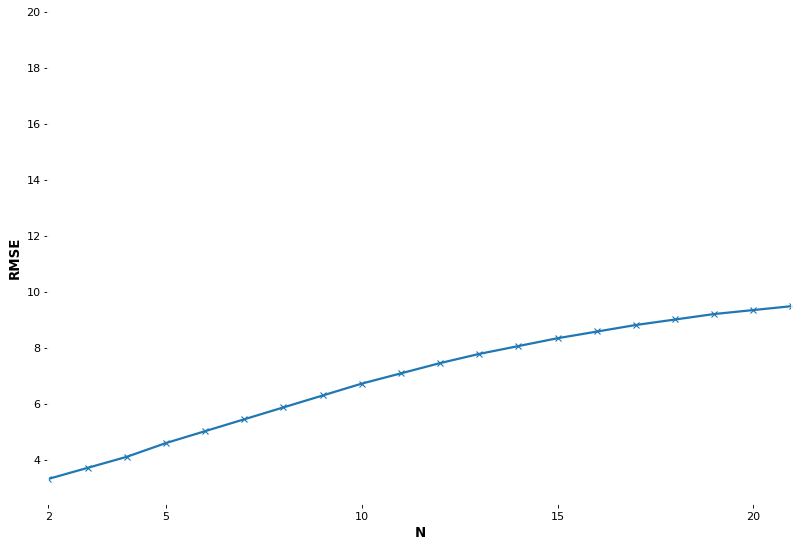

In [43]:
# Plot RMSE versus N
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])
matplotlib.rcParams.update({'font.size': 14})

<Figure size 960x640 with 0 Axes>

Text(0.5, 0, 'N')

Text(0, 0.5, 'MAPE')

(2.0, 21.0)

([<matplotlib.axis.XTick at 0x22488c09a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

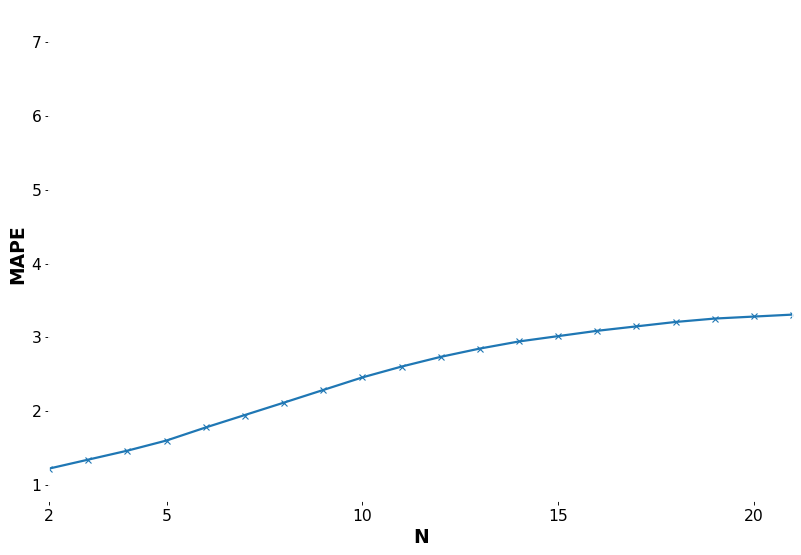

In [44]:
# Plot MAPE versus N. Note for MAPE smaller better. 
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])

In [45]:
# Set optimum N
N_opt = 2

## Plot Predictions on dev set

Text(0.5, 0, 'date')

Text(0, 0.5, 'USD')

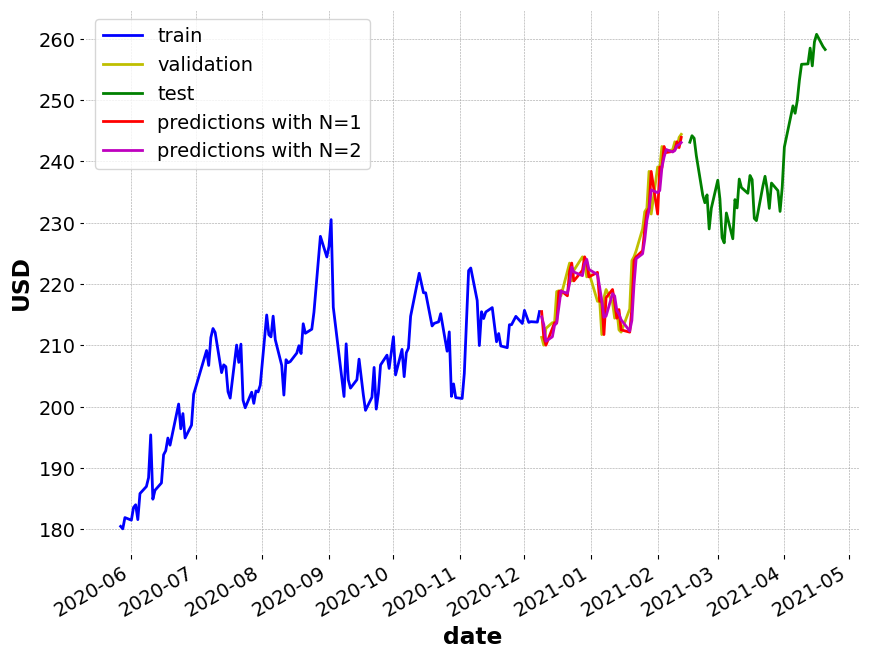

In [46]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N2', style='m-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 0, 'date')

Text(0, 0.5, 'USD')

(18346.0, 18806.0)

Text(0.5, 1.0, 'Zoom in to dev set')

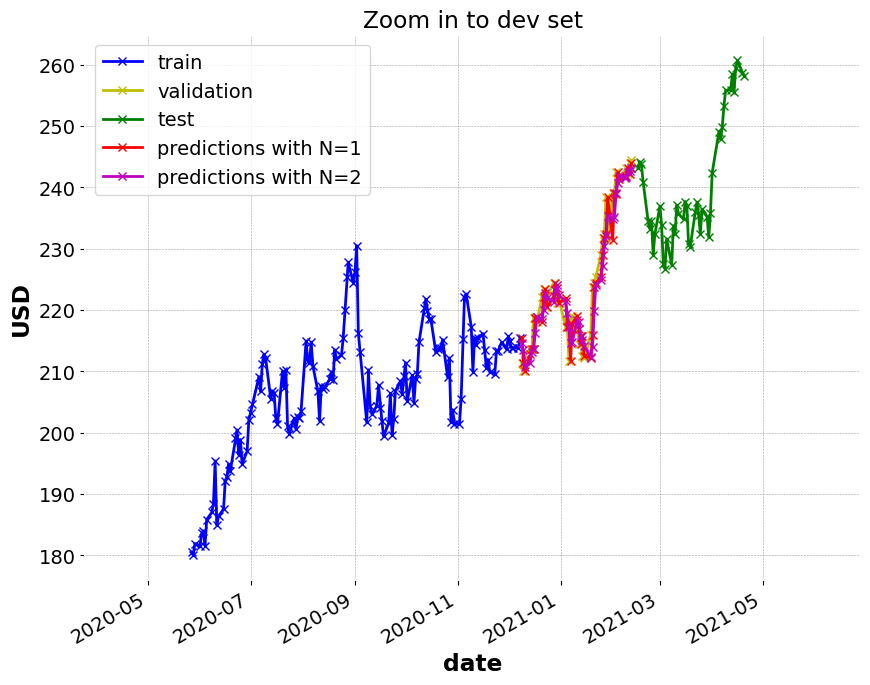

In [47]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N2', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 3, 25), date(2021, 6, 28)])
#ax.set_ylim([15,25])
ax.set_title('Zoom in to dev set')

## Final Model

In [48]:
est_list

array([206.74801045, 206.78109233, 206.80451076, 206.84712099,
       206.89577825, 206.94325837, 207.02600567, 207.1085737 ,
       207.18429187, 207.28630703, 207.39609688, 207.48471874,
       207.58373501, 207.69613057, 207.80168546, 207.8896388 ,
       207.98126799, 208.04106348, 208.10143915, 208.124906  ,
       208.18645686, 208.25562702, 208.31056165, 208.34884634,
       208.39539313, 208.42091859, 208.443866  , 208.48959025,
       208.58252906, 208.6781346 , 208.77844988, 208.8988315 ,
       209.03431855, 209.17155681, 209.34237207, 209.47077099,
       209.64203419, 209.81052609, 209.99698948, 210.17572186,
       210.35350562, 210.53080527, 210.71336979, 210.88864017,
       211.07117913])

In [49]:
est_list = get_preds_mov_avg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
test.head()

RMSE = 3.966
MAPE = 1.343%


,date,open,high,low,close,adj_close,volume,month,est_N2
282,2021-02-16,245.029999,246.130005,242.919998,243.699997,243.139999,26728500,2,244.177620
283,2021-02-17,241.320007,244.309998,240.940002,244.199997,244.199997,21653500,2,243.783524
284,2021-02-18,241.800003,243.929993,240.860001,243.789993,243.789993,16925600,2,243.669998
285,2021-02-19,243.750000,243.860001,240.179993,240.970001,240.970001,25262600,2,243.994995
286,2021-02-22,237.419998,237.929993,232.399994,234.509995,234.509995,36446900,2,242.379997


In [50]:
test.tail()

,date,open,high,low,close,adj_close,volume,month,est_N2
322,2021-04-14,257.480011,258.829987,255.160004,255.589996,255.589996,23070900,4,257.199997
323,2021-04-15,257.929993,259.929993,257.730011,259.500000,259.500000,25627500,4,257.039993
324,2021-04-16,259.470001,261.000000,257.600006,260.739990,260.739990,24856900,4,257.544998
325,2021-04-19,260.190002,261.480011,257.820007,258.739990,258.739990,23209300,4,260.119995
326,2021-04-20,257.820007,260.200012,256.839996,258.260010,258.260010,19712400,4,259.739990


Text(0.5, 0, 'date')

Text(0, 0.5, 'USD')

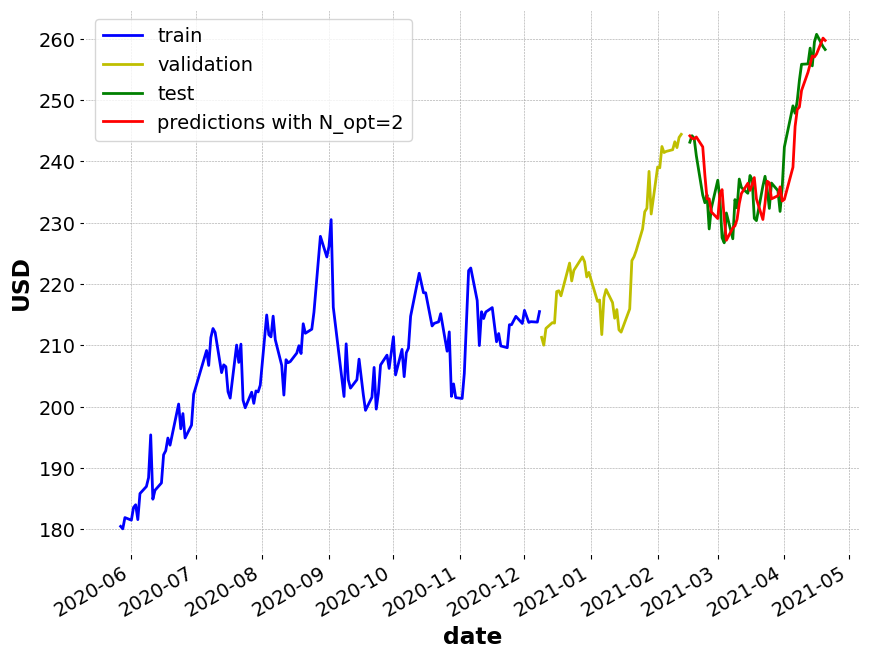

In [51]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N2', style='r-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N_opt=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 0, 'date')

Text(0, 0.5, 'USD')

(18346.0, 18745.0)

Text(0.5, 1.0, 'Zoom in to test set')

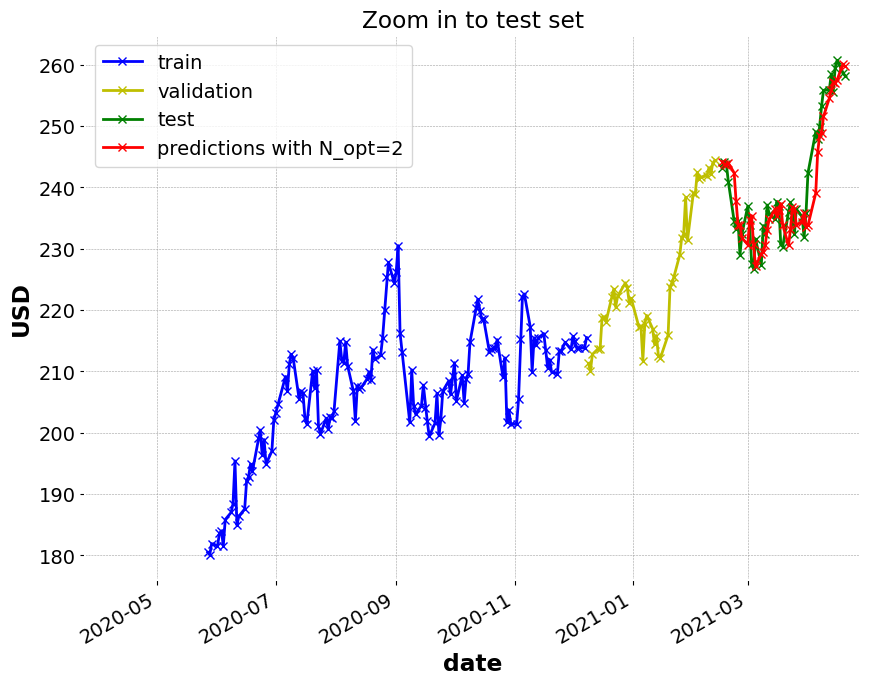

In [52]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N2', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N_opt=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 3, 25), date(2021, 4, 28)])
#ax.set_ylim([20,22])
ax.set_title('Zoom in to test set')

Text(0.5, 0, 'date')

Text(0, 0.5, 'USD')

(18637.0, 18736.0)

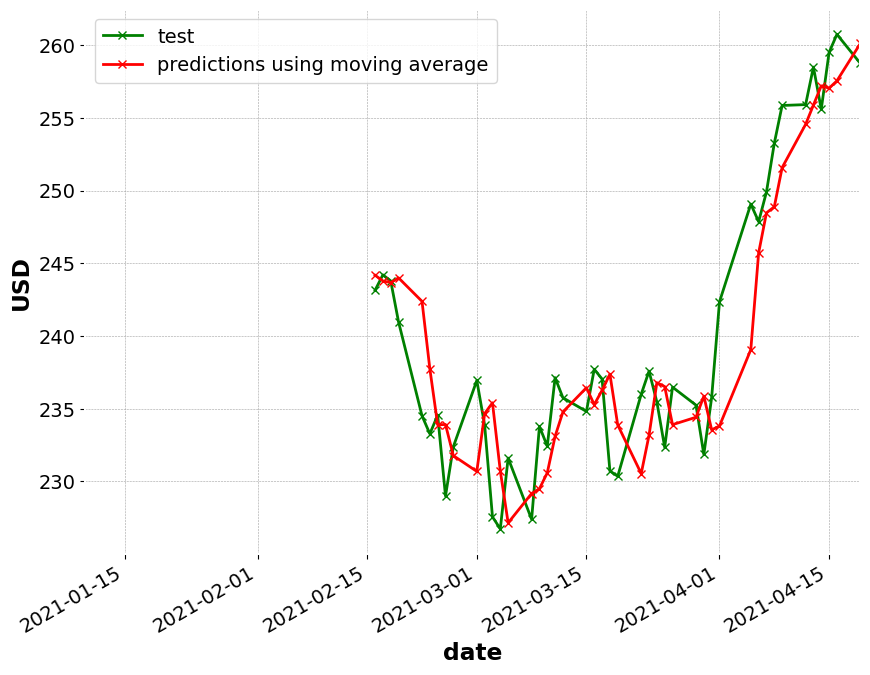

In [53]:
# Plot adjusted close over time, only for test set
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='adj_close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N2', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using moving average'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2021, 1, 10), date(2021, 4, 19)])
#ax.set_ylim([20,22])

In [54]:
# Save as csv
test_mov_avg = test
test_mov_avg.to_csv("test_mov_avg.csv")

In [55]:
RMSE[0]
RMSE[1]
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))

3.243030826376773

3.331488301896923

RMSE = 3.966
MAPE = 1.343%


# Findings
* On the dev set, the lowest RMSE is 3.24 which is achieved using N=1, ie. using value on day t-1 to predict value on day t
* On the dev set, the next lowest RMSE is 3.33 which is achieved using N=2, ie. using values from days t-2 to t-1 to predict value on day t
* We will use N_opt=2 in this work since our aim here is to use moving average
* On the test set, the RMSE is 3.964 and MAPE is 1.341% using N_opt=2

##### THE END 